# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create lists
city_name = []
lat = []
lon = []
high = []
humid = []
cloud = []
wind = []
country = []
time = []

cty_ct = 1

url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'
print("Beggining Data Retrieval")
print("------------------------")
for place in cities:
    try:        
        response = requests.get(f"{url}&q={place}&APPID={weather_api_key}").json() 
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        high.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        time.append(response['dt'])
        print(f"Processing Record {cty_ct} of set 1 | {place}")
        cty_ct = cty_ct + 1
    except:
        print(f"City not found! Skipping...")      

Beggining Data Retrieval
------------------------
Processing Record 1 of set 1 | port alfred
Processing Record 2 of set 1 | mataura
Processing Record 3 of set 1 | busselton
Processing Record 4 of set 1 | fergus falls
City not found! Skipping...
Processing Record 5 of set 1 | bluff
Processing Record 6 of set 1 | namatanai
Processing Record 7 of set 1 | butaritari
Processing Record 8 of set 1 | te anau
Processing Record 9 of set 1 | georgiyevka
Processing Record 10 of set 1 | havelock
Processing Record 11 of set 1 | bolivar
Processing Record 12 of set 1 | kinango
Processing Record 13 of set 1 | seminole
Processing Record 14 of set 1 | byron bay
Processing Record 15 of set 1 | cape town
Processing Record 16 of set 1 | hobart
Processing Record 17 of set 1 | hermanus
Processing Record 18 of set 1 | nago
Processing Record 19 of set 1 | sao felix do xingu
Processing Record 20 of set 1 | saint stephen
Processing Record 21 of set 1 | mikhaylovka
Processing Record 22 of set 1 | shache
Processing

Processing Record 185 of set 1 | oussouye
Processing Record 186 of set 1 | broome
Processing Record 187 of set 1 | necochea
Processing Record 188 of set 1 | vila franca do campo
Processing Record 189 of set 1 | birao
Processing Record 190 of set 1 | hihya
City not found! Skipping...
Processing Record 191 of set 1 | santa barbara
Processing Record 192 of set 1 | bethel
Processing Record 193 of set 1 | mazatlan
City not found! Skipping...
Processing Record 194 of set 1 | alice springs
Processing Record 195 of set 1 | changping
Processing Record 196 of set 1 | khash
Processing Record 197 of set 1 | inta
Processing Record 198 of set 1 | poum
Processing Record 199 of set 1 | canutama
Processing Record 200 of set 1 | rorvik
Processing Record 201 of set 1 | gornopravdinsk
Processing Record 202 of set 1 | winnemucca
Processing Record 203 of set 1 | fairbanks
Processing Record 204 of set 1 | kavieng
Processing Record 205 of set 1 | itarema
Processing Record 206 of set 1 | severo-kurilsk
Process

Processing Record 369 of set 1 | los llanos de aridane
Processing Record 370 of set 1 | saint-augustin
Processing Record 371 of set 1 | homer
City not found! Skipping...
Processing Record 372 of set 1 | edgewater
Processing Record 373 of set 1 | navalmoral de la mata
Processing Record 374 of set 1 | inirida
Processing Record 375 of set 1 | sorland
Processing Record 376 of set 1 | arzgir
Processing Record 377 of set 1 | rumonge
Processing Record 378 of set 1 | egvekinot
City not found! Skipping...
Processing Record 379 of set 1 | matata
Processing Record 380 of set 1 | chimoio
Processing Record 381 of set 1 | cidreira
Processing Record 382 of set 1 | normandin
Processing Record 383 of set 1 | zhezkazgan
Processing Record 384 of set 1 | amapa
Processing Record 385 of set 1 | clyde river
Processing Record 386 of set 1 | sakakah
Processing Record 387 of set 1 | olga
Processing Record 388 of set 1 | seoul
Processing Record 389 of set 1 | taltal
Processing Record 390 of set 1 | valparaiso
Pr

Processing Record 554 of set 1 | delicias
Processing Record 555 of set 1 | shamgarh
Processing Record 556 of set 1 | tuy hoa
Processing Record 557 of set 1 | shelburne
Processing Record 558 of set 1 | huntsville
Processing Record 559 of set 1 | mwinilunga
Processing Record 560 of set 1 | arlit
Processing Record 561 of set 1 | yulara
Processing Record 562 of set 1 | gundlupet
Processing Record 563 of set 1 | cap malheureux
Processing Record 564 of set 1 | novovarshavka
Processing Record 565 of set 1 | praia
Processing Record 566 of set 1 | kichera
Processing Record 567 of set 1 | kongolo
Processing Record 568 of set 1 | kumluca
Processing Record 569 of set 1 | san andres
Processing Record 570 of set 1 | teya
Processing Record 571 of set 1 | tukrah
Processing Record 572 of set 1 | bandraboua
Processing Record 573 of set 1 | vallenar
Processing Record 574 of set 1 | farah


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Lat":lat, 
    "Lng":lon,
    "Max Temp": high,
    "Humidity": humid,
    "Cloudiness":cloud,
    "Wind Speed":wind,     
    "Country":country,
    "Date":time}

# Create a data frame from dictionary
weather_df = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_df.count()
        

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Save to CSV
weather_df.to_csv('Output_data/weather.csv')

# Display data 
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,66.00,92,90,3.00,ZA,1615851698
1,Mataura,-46.1927,168.8643,55.99,69,74,21.99,NZ,1615851699
2,Busselton,-33.6500,115.3333,66.99,48,56,5.01,AU,1615851582
3,Fergus Falls,46.2830,-96.0776,32.00,80,75,10.36,US,1615851699
4,Bluff,-46.6000,168.3333,55.99,69,74,21.99,NZ,1615851700


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
for h in weather_df["Humidity"]:
    if h > 100:
        print("At least 1 city has humidity greater than 100%")
        break
    else:
        print("No cities have hunidity above 100%")
        break

No cities have hunidity above 100%


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

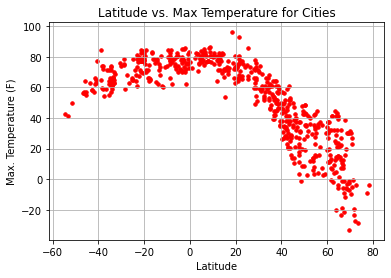

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=12, color='red')

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature for Cities")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

EXPLANATION
This is comparing the max temp to the latitude. You can see the correlation between latitude and max temp. It also shows that temperatures are much colder on the northern hemisphere.

## Latitude vs. Humidity Plot

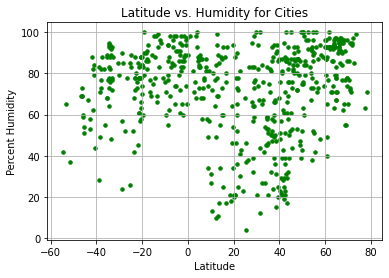

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=12, color='green')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity for Cities")
plt.ylabel("Percent Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humid_vs_Latitude.png")

# Show plot
plt.show()

EXPLANATION
This graph is comparing humidity to latitude. Most cities in the world tend to be in more humid climates with most cities with a drier climate being just north of the equator.

## Latitude vs. Cloudiness Plot

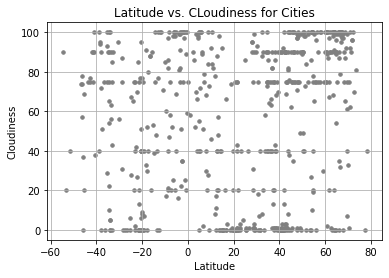

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=12, color='gray')

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloud_vs_Latitude.png")

# Show plot
plt.show()

EXPLANATION 
This graph is comparing how cloudy a city is compared to its latitude. There does not appear to be a relationship between humidity and latitude.

## Latitude vs. Wind Speed Plot

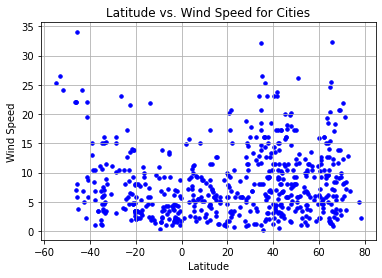

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=12, color='blue')

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed for Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_vs_Latitude.png")

# Show plot
plt.show()

EXPLANATION 
This graph is comparing how windy a city is compared to its latitude. There does not appear to be a relationship between humidity and latitude. 

## Linear Regression

In [13]:
#Seperate by north and southern 
north = weather_df.loc[weather_df["Lat"] >= 0.0]
#north
south = weather_df.loc[weather_df["Lat"] < 0.0]
#south

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

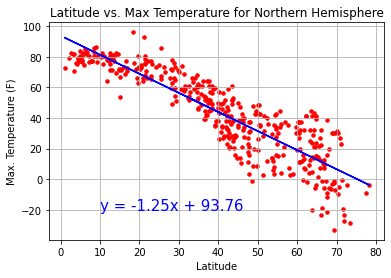

The r-squared is: 0.7856426049887658


In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Max Temp"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Max Temp"], marker="o", s=12, color='red')
plt.plot(north["Lat"],reg,"b-")
plt.annotate(line,(10,-20),fontsize=15,color="blue")
plt.title("Latitude vs. Max Temperature for Northern Hemisphere")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_temp_north.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

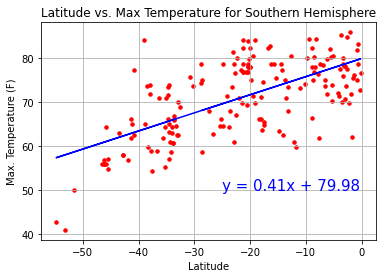

The r-squared is: 0.42360977652095966


In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Max Temp"])
reg = south["Lat"]*slope+intercept
a_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south["Lat"],south["Max Temp"], marker="o", s=12, color='red')
plt.plot(south["Lat"],reg,"b-")
plt.annotate(a_line,(-25,50),fontsize=15,color="blue")
plt.title("Latitude vs. Max Temperature for Southern Hemisphere")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_temp_south.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

EXPLINATION: Max Temp: Northern vs. Southern 
Comparing the northern and southern hemispheres max temperatures, the northern hemisphere has a much stronger correlation than the southern hemisphere. This can also be confirmed with the r-squared values.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

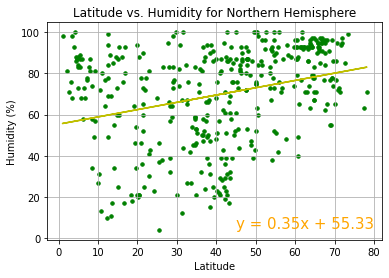

The r-squared is: 0.08628545103550883


In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Humidity"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Humidity"], marker="o", s=12, color='green')
plt.plot(north["Lat"],reg,"y-")
plt.annotate(line,(45,5),fontsize=15,color="orange")
plt.title("Latitude vs. Humidity for Northern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_humid_north.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

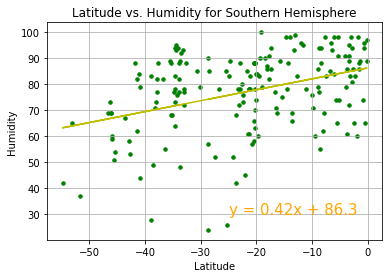

The r-squared is: 0.1463164130749715


In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Humidity"])
reg = south["Lat"]*slope+intercept
a_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south["Lat"],south["Humidity"], marker="o", s=12, color='green')
plt.plot(south["Lat"],reg,"y-")
plt.annotate(a_line,(-25,30),fontsize=15,color="orange")
plt.title("Latitude vs. Humidity for Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_humid_south.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

EXPLINATION: Humidity: Northern vs. Southern 
For both northern and southern hemispheres latitude does not appear to have a relationship with humidity. There does appear to be a slight positive relationship. Both have a low r-squared value so there is a weak correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

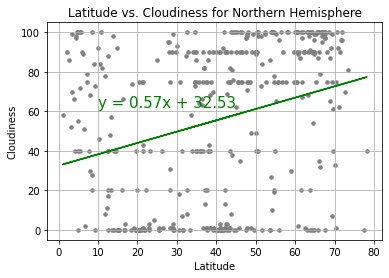

The r-squared is: 0.08249804949926857


In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Cloudiness"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Cloudiness"], marker="o", s=12, color='gray')
plt.plot(north["Lat"],reg,"g-")
plt.annotate(line,(10,62),fontsize=15,color="green")
plt.title("Latitude vs. Cloudiness for Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_cloud_north.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

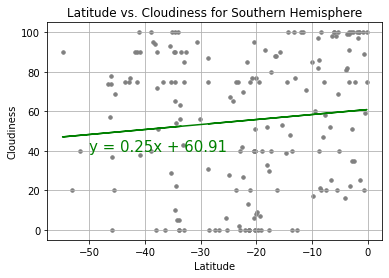

The r-squared is: 0.010116890392651984


In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Cloudiness"])
reg = south["Lat"]*slope+intercept
a_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south["Lat"],south["Cloudiness"], marker="o", s=12, color='gray')
plt.plot(south["Lat"],reg,"g-")
plt.annotate(a_line,(-50,40),fontsize=15,color="green")
plt.title("Latitude vs. Cloudiness for Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_cloud_south.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

EXPLINATION: Cloudiness: Northern vs. Southern 
The northern hemisphere does have a steeper regression line showing that it has slightly stronger correlation. Overall, there is not a correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

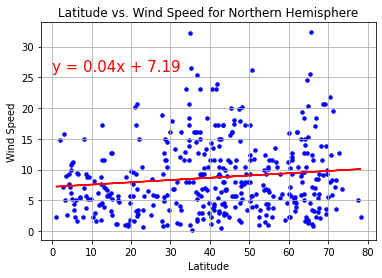

The r-squared is: 0.015236928342334657


In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Wind Speed"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Wind Speed"], marker="o", s=12, color='blue')
plt.plot(north["Lat"],reg,"r-")
plt.annotate(line,(0,26),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed for Northern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_wind_north.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

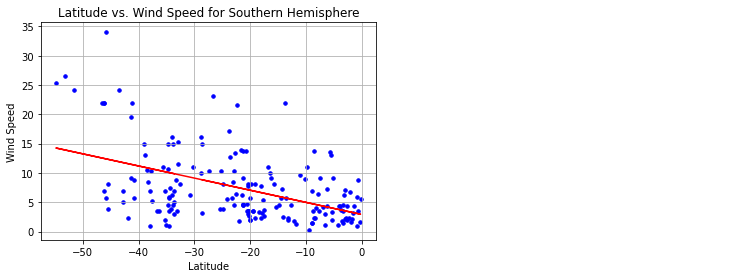

The r-squared is: 0.22789512518266747


In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Wind Speed"])
reg = south["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south["Lat"],south["Wind Speed"], marker="o", s=12, color='blue')
plt.plot(south["Lat"],reg,"r-")
plt.annotate(line,(45,5),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed for Southern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_wind_south.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

EXPLINATION: wind: Northern vs. Southern 
There is a stronger correlation between wind and latitude in the southern hemisphere. The regression line has a positive slope for the northern hemisphere but a negative slope for the southern hemisphere.